In [64]:
import pandas as pd  #data preprocessing
import numpy as np 
pd.set_option('display.max_columns', None) #to diplay all columns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [65]:
#import the dataset
worldpop = pd.read_csv("WorldPopulation.csv")
worldpop.head()

,Year,WorldPopulation,YearlyChange,NetChange,Density(P/Km²),UrbanPop,UrbanPopPer
0,2020,7794798739,1.05,81330639,52,4378993944,56
1,2019,7713468100,1.08,82377060,52,4299438618,56
2,2018,7631091040,1.10,83232115,51,4219817318,55
3,2017,7547858925,1.12,83836876,51,4140188594,55
4,2016,7464022049,1.14,84224910,50,4060652683,54


In [66]:
#check the shape
worldpop.shape

(94, 7)

In [67]:
worldpop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             94 non-null     int64 
 1   WorldPopulation  94 non-null     object
 2   YearlyChange     94 non-null     object
 3   NetChange        94 non-null     object
 4   Density(P/Km²)   94 non-null     object
 5   UrbanPop         94 non-null     object
 6   UrbanPopPer      94 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.3+ KB


In [68]:
#to check for missing values
worldpop.isnull().sum()

Year               0
WorldPopulation    0
YearlyChange       0
NetChange          0
Density(P/Km²)     0
UrbanPop           0
UrbanPopPer        0
dtype: int64

In [69]:
 # delete row 70 - 94
worldpop = worldpop.drop(labels=range (70, 94), axis=0)

In [70]:
worldpop.shape

(70, 7)

In [71]:
worldpop.tail()

,Year,WorldPopulation,YearlyChange,NetChange,Density(P/Km²),UrbanPop,UrbanPopPer
65,1955,2773019936,1.77,48173195,19,877008842,32
66,1954,2724846741,1.76,47237781,18,850179106,31
67,1953,2677608960,1.78,46747398,18,824289989,31
68,1952,2630861562,1.81,46827301,18,799282533,30
69,1951,2584034261,1.88,47603112,17,775067697,30


In [72]:
#to change the values to numeric values
worldpop = worldpop.apply(pd.to_numeric)

In [73]:
#check the statistical values
worldpop.describe(include = "all")

,Year,WorldPopulation,YearlyChange,NetChange,Density(P/Km²),UrbanPop,UrbanPopPer
count,70.000000,7.000000e+01,70.000000,7.000000e+01,70.000000,7.000000e+01,70.000000
mean,1985.500000,5.002010e+09,1.616429,7.511954e+07,33.557143,2.226815e+09,42.200000
std,20.351085,1.594877e+09,0.321288,1.256972e+07,10.723989,1.070191e+09,7.447595
min,1951.000000,2.584034e+09,1.050000,4.674740e+07,17.000000,7.750677e+08,30.000000
25%,1968.250000,3.570120e+09,1.262500,7.314225e+07,24.000000,1.294408e+09,36.000000
50%,1985.500000,4.915745e+09,1.770000,7.942852e+07,33.000000,2.035272e+09,41.500000
75%,2002.750000,6.361332e+09,1.847500,8.356683e+07,42.750000,3.054260e+09,48.000000
max,2020.000000,7.794799e+09,2.090000,9.290386e+07,52.000000,4.378994e+09,56.000000


In [74]:
# to check the data type
worldpop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             70 non-null     int64  
 1   WorldPopulation  70 non-null     int64  
 2   YearlyChange     70 non-null     float64
 3   NetChange        70 non-null     int64  
 4   Density(P/Km²)   70 non-null     int64  
 5   UrbanPop         70 non-null     int64  
 6   UrbanPopPer      70 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 4.4 KB


In [75]:
#renaming the dataset
df = worldpop

# visualization

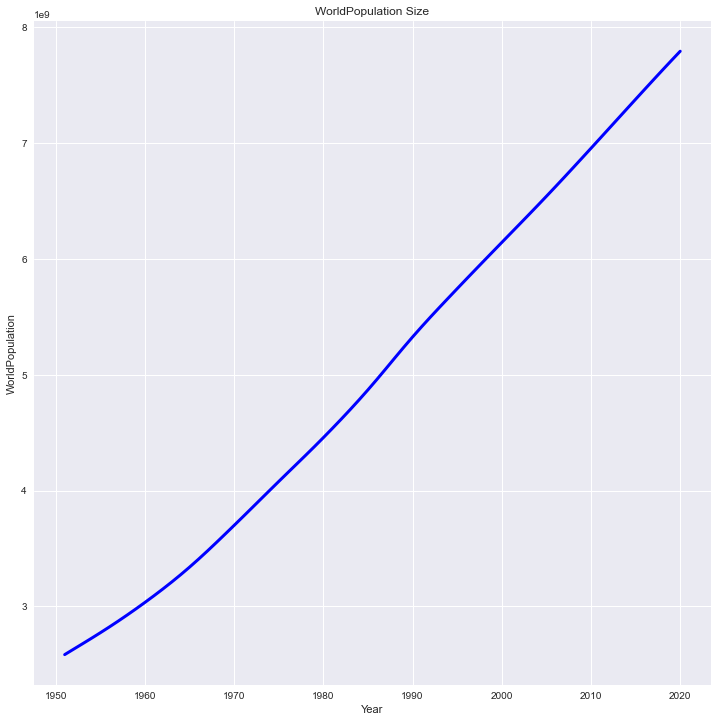

In [76]:
# increase in population size over time
plt.style.use('seaborn')
sns.relplot(data=df[['Year','WorldPopulation']], x='Year', y='WorldPopulation', kind='line', height=10, linewidth=3, color='blue')
plt.title('WorldPopulation Size')
plt.show()

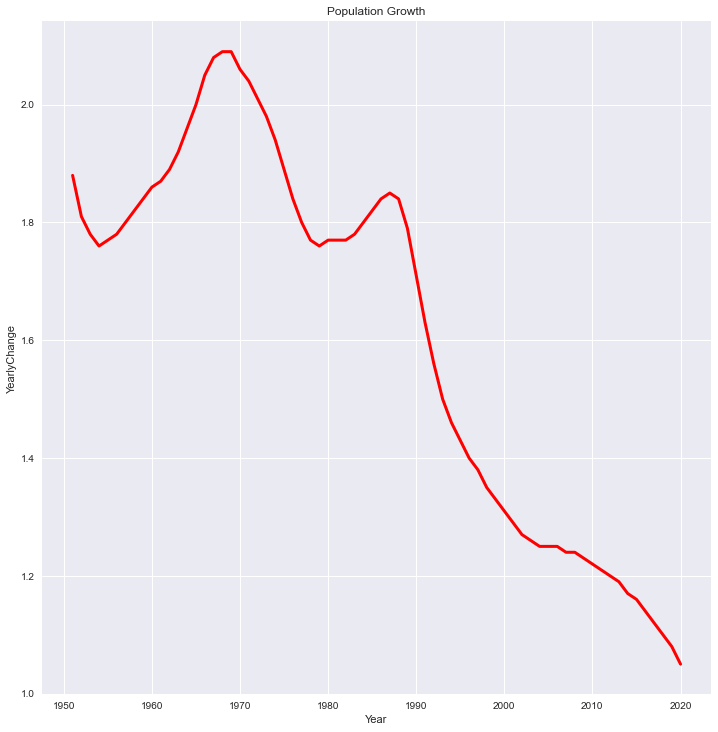

In [77]:
#percentage change in population per yer - measure of population growth
plt.style.use('seaborn')
sns.relplot(data=df[['Year','YearlyChange']], x='Year', y='YearlyChange', kind='line', height=10, linewidth=3, color='red')
plt.title('Population Growth')
plt.show()


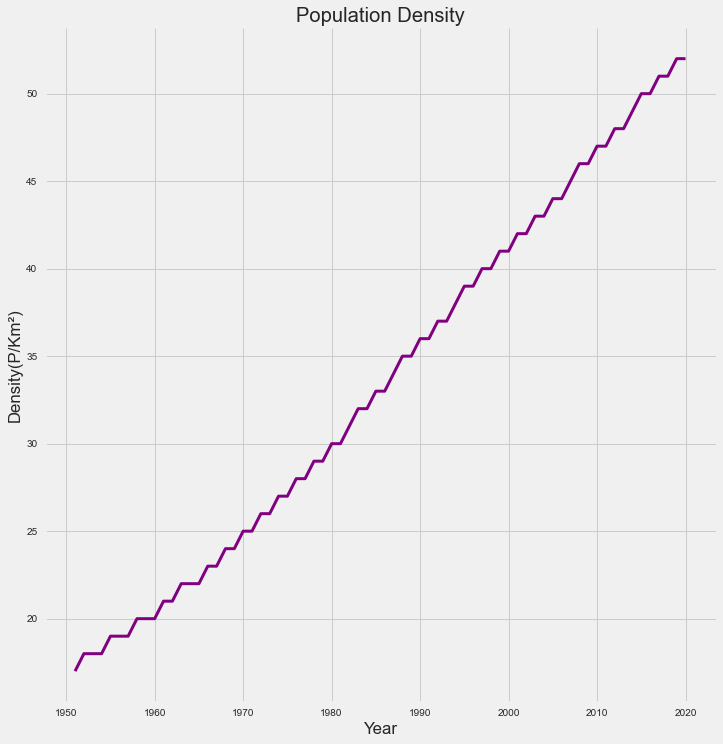

In [78]:
# population density over time
plt.style.use('fivethirtyeight')
sns.relplot(data=df[['Year','Density(P/Km²)']], x='Year', y='Density(P/Km²)', kind='line', height=10, linewidth=3, color='purple')
plt.title('Population Density')
plt.show()

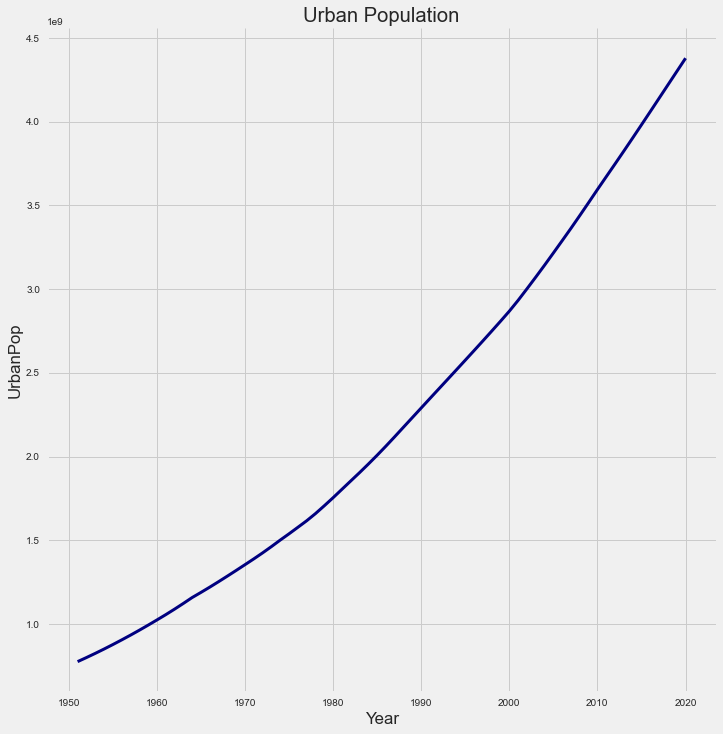

In [79]:
# population density over time
plt.style.use('fivethirtyeight')
sns.relplot(data=df[['Year','UrbanPop']], x='Year', y='UrbanPop', kind='line', height=10, linewidth=3, color='navy')
plt.title('Urban Population')
plt.show()

In [80]:
#to get the rural population
df['Ruralpop'] = df['WorldPopulation'] - df['UrbanPop']

In [81]:
df.head()

,Year,WorldPopulation,YearlyChange,NetChange,Density(P/Km²),UrbanPop,UrbanPopPer,Ruralpop
0,2020,7794798739,1.05,81330639,52,4378993944,56,3415804795
1,2019,7713468100,1.08,82377060,52,4299438618,56,3414029482
2,2018,7631091040,1.10,83232115,51,4219817318,55,3411273722
3,2017,7547858925,1.12,83836876,51,4140188594,55,3407670331
4,2016,7464022049,1.14,84224910,50,4060652683,54,3403369366


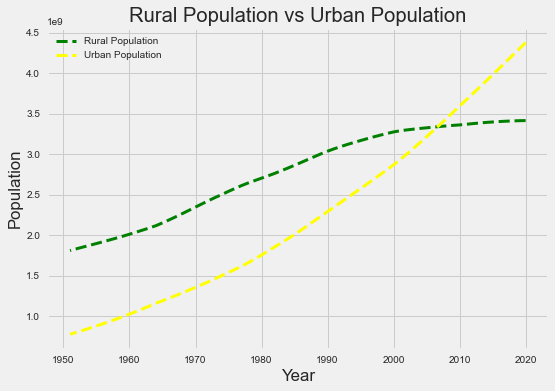

In [82]:
plt.style.use('fivethirtyeight')

plt.plot(df['Year'], df['Ruralpop'],linewidth=3, linestyle="dashed",color='green', label='Rural Population')
plt.plot(df['Year'], df['UrbanPop'], linewidth=3, linestyle="dashed",color='yellow', label='Urban Population')
plt.title('Rural Population vs Urban Population')

plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

corr = df.corr()
corr

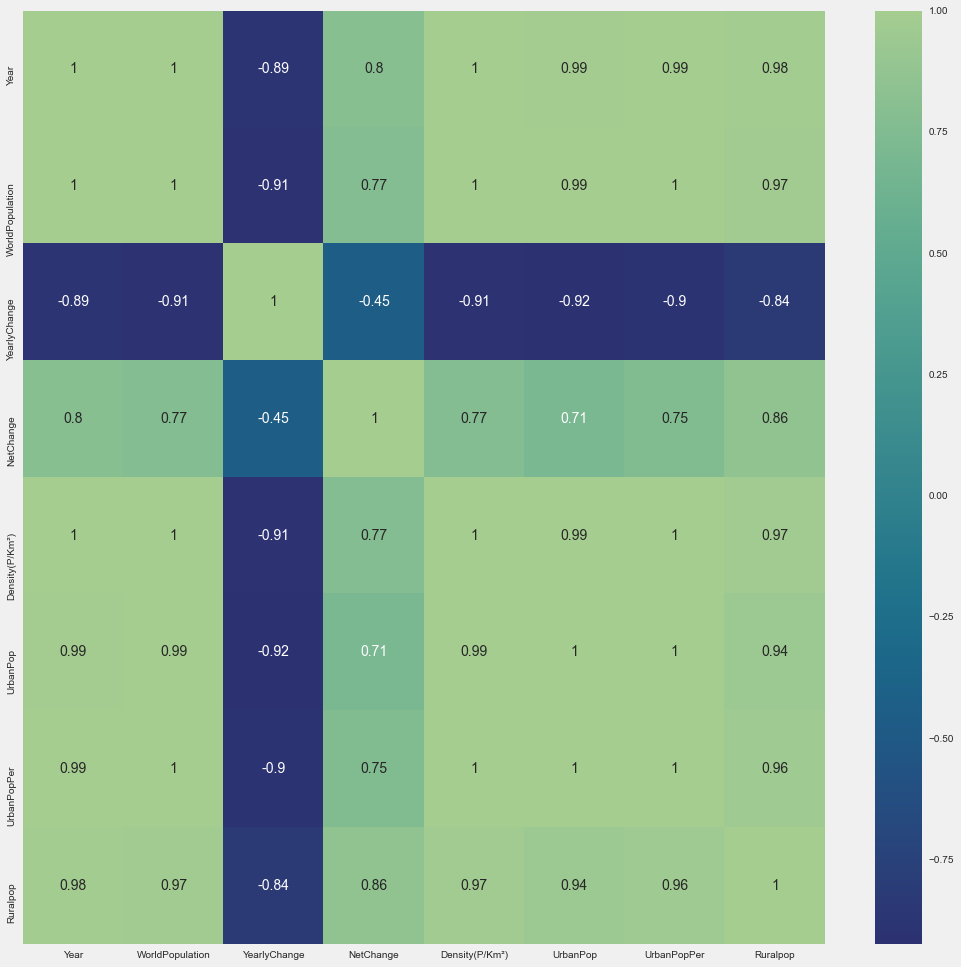

In [83]:
corr = df.corr()

Y_feat = corr.index
plt.figure(figsize = (16,16))
#plot heatmap

P = sns.heatmap(df[Y_feat].corr(),annot=True,cmap="crest_r")

LINEAR REGRESSION MODEL

In [84]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [85]:
x2 = df["Year"].values.reshape(-1, 1)                   #reshaping data into a single feature
y2 = df["WorldPopulation"].values.reshape(-1, 1)

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, train_size = 0.8, random_state = 100)

In [87]:
model = LinearRegression() 
model.fit(x_train, y_train)

LinearRegression()

In [88]:
score = model.score(x_train, y_train)
print(score)

0.997117537202534


In [89]:
y_pred = model.predict(x_test)
pred = {"y_test": y_test, "y_pred":y_pred}

In [90]:
y_pred = model.predict([[2025]])  #predicting specific year
y_pred

array([[8.10791308e+09]])

In [91]:
#Reshaping the model
test= np.array(x_test).reshape((-1, 1))
y_t= np.array(y_test).reshape((-1, 1))
y_pred = model.predict(test)

In [92]:
r2 = r2_score(y_test, y_pred)
print("R2 score: "+str(r2))

R2 score: 0.9951742457325766
